In [2]:
# Installing required libraries
!pip install diffusers transformers accelerate torch pillow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 4.1/4.1 MB 30.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   --------------------------------------- 566.1/566.1 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.0
    Uninstalling huggingface-hub-0.23.0:
      Successfully uninstalled huggingface-hub-0.23.0



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\nidhi\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Loading the model
print("Loading Stable Diffusion model...")
print("This may take a few minutes on first run...")

# Set device (GPU if available, otherwise CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pipeline
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

print("✓ Model loaded successfully!")


Loading Stable Diffusion model...
This may take a few minutes on first run...
Using device: cpu


C:\Users\nidhi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nidhi\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

✓ Model loaded successfully!


In [5]:
def generate_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image from a text prompt
    
    Parameters:
    - prompt: Text description of the image you want to generate
    - num_inference_steps: Number of denoising steps (higher = better quality but slower)
    - guidance_scale: How closely to follow the prompt (7-9 is good)
    """
    print(f"Generating image for prompt: '{prompt}'")
    print("Please wait...")
    
    # Generate the image
    with torch.autocast(device):
        image = pipe(
            prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale
        ).images[0]
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Prompt: {prompt}", wrap=True)
    plt.show()
    
    return image

Generating image for prompt: 'a beautiful sunset over mountains with a lake in the foreground, digital art'
Please wait...


100%|██████████| 50/50 [04:00<00:00,  4.81s/it]


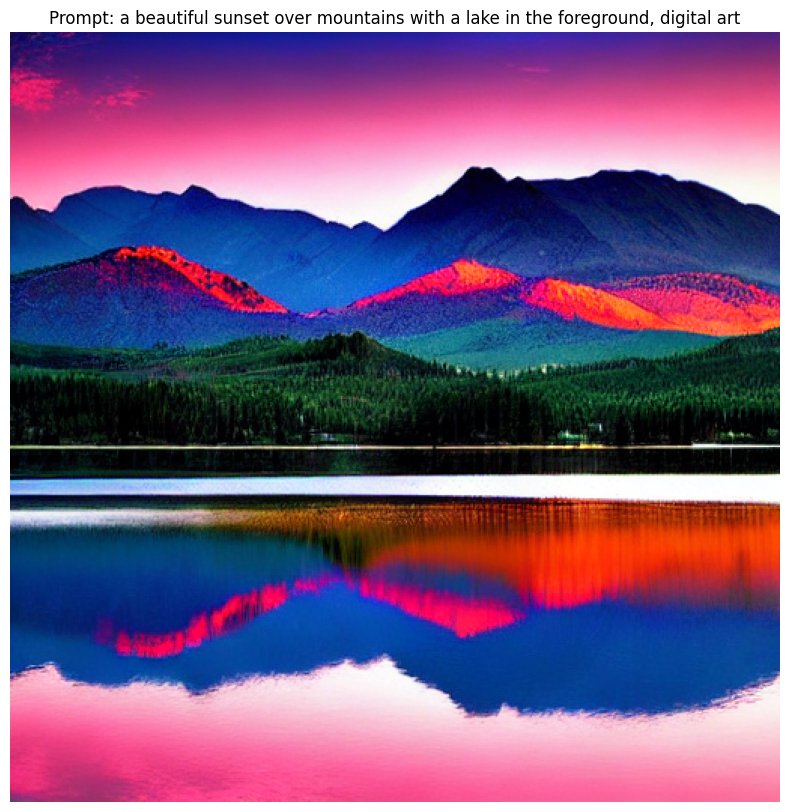

Image saved as 'generated_image.png'


In [6]:
# ENTER YOUR PROMPT HERE:
user_prompt = "a beautiful sunset over mountains with a lake in the foreground, digital art"

# Generate and display the image
generated_image = generate_image(user_prompt)

# Optional: Save the image
generated_image.save("generated_image.png")
print("Image saved as 'generated_image.png'")